# Importation et inspection des données

In [45]:
#dossier de travail
import os
os.chdir("C:/Users/ricco/Desktop/demo")

#importation des individus actifs
import pandas
ind_actifs = pandas.read_excel("loisirs.xlsx",sheet_name="data")
ind_actifs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7836 entries, 0 to 7835
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reading          7836 non-null   object
 1   Listening_music  7836 non-null   object
 2   Cinema           7836 non-null   object
 3   Show             7836 non-null   object
 4   Exhibition       7836 non-null   object
 5   Computer         7836 non-null   object
 6   Sport            7836 non-null   object
 7   Walking          7836 non-null   object
 8   Travelling       7836 non-null   object
 9   Playing_music    7836 non-null   object
 10  Collecting       7836 non-null   object
 11  Volunteering     7836 non-null   object
 12  Mechanic         7836 non-null   object
 13  Gardening        7836 non-null   object
 14  Knitting         7836 non-null   object
 15  Cooking          7836 non-null   object
 16  Fishing          7836 non-null   object
 17  TV               7836 non-null   

In [46]:
#isoler les variables actives
X_actifs = ind_actifs[ind_actifs.columns[:18]]
X_actifs.columns

Index(['Reading', 'Listening_music', 'Cinema', 'Show', 'Exhibition',
       'Computer', 'Sport', 'Walking', 'Travelling', 'Playing_music',
       'Collecting', 'Volunteering', 'Mechanic', 'Gardening', 'Knitting',
       'Cooking', 'Fishing', 'TV'],
      dtype='object')

In [47]:
#nombre d'obs.
n = X_actifs.shape[0]
print(n)

#nombre de var.
p = X_actifs.shape[1]
print(p)

7836
18


In [48]:
#nombre total de modalités
import numpy
M = numpy.sum(X_actifs.apply(axis=0,func=lambda x:x.value_counts().shape[0]))
print(M)

39


In [49]:
#nombre max de facteurs (Livre, page 293)
print(M-p)

21


In [50]:
#inertie totale - Livre, page 299
print(M/p-1)

1.1666666666666665


# ACM avec fanalysis

In [51]:
#installation à la volée du package (éventuellement)
#!pip install fanalysis

In [52]:
#importation du module
from fanalysis.mca import MCA

#instanciation
acm = MCA(row_labels=X_actifs.index,var_labels=X_actifs.columns)

#exécution
acm.fit(X_actifs.values)

#valeurs propres
acm.eig_

array([[1.94203920e-01, 8.17135274e-02, 7.14523138e-02, 6.35737241e-02,
        5.88448160e-02, 5.58523058e-02, 5.55688411e-02, 5.32930394e-02,
        5.27382461e-02, 4.91374174e-02, 4.67390321e-02, 4.50296758e-02,
        4.38053722e-02, 4.35085505e-02, 4.09629230e-02, 3.83005299e-02,
        3.72658100e-02, 3.64229806e-02, 3.53180258e-02, 3.23581436e-02,
        3.05774725e-02],
       [1.66460503e+01, 7.00401663e+00, 6.12448404e+00, 5.44917635e+00,
        5.04384137e+00, 4.78734050e+00, 4.76304352e+00, 4.56797480e+00,
        4.52042110e+00, 4.21177863e+00, 4.00620275e+00, 3.85968650e+00,
        3.75474619e+00, 3.72930433e+00, 3.51110768e+00, 3.28290257e+00,
        3.19421229e+00, 3.12196977e+00, 3.02725935e+00, 2.77355517e+00,
        2.62092621e+00],
       [1.66460503e+01, 2.36500669e+01, 2.97745509e+01, 3.52237273e+01,
        4.02675686e+01, 4.50549091e+01, 4.98179527e+01, 5.43859275e+01,
        5.89063486e+01, 6.31181272e+01, 6.71243299e+01, 7.09840164e+01,
        7.4738

In [53]:
#petite vérif. inertie totale = somme des val.p
print(numpy.sum(acm.eig_[0]))

1.1666666666666672


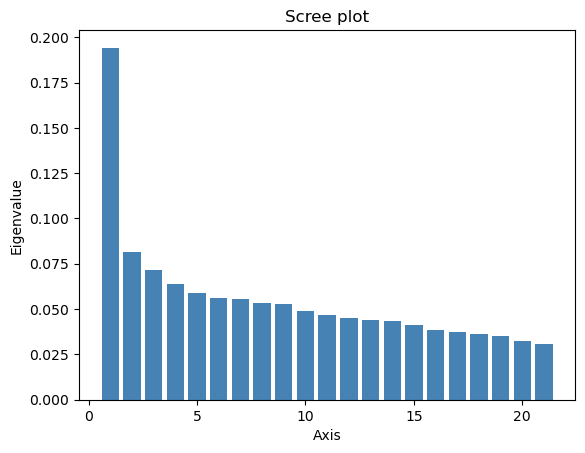

In [54]:
#scree plot
acm.plot_eigenvalues()

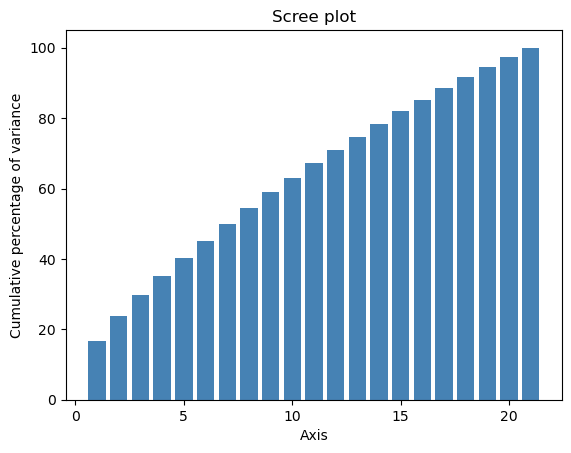

In [55]:
#pourcentage de variance cumulée
acm.plot_eigenvalues("cumulative")

## Informations sur les individus

In [56]:
#infos
info_lig = acm.row_topandas()
info_lig.columns

Index(['row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim4',
       'row_coord_dim5', 'row_coord_dim6', 'row_coord_dim7', 'row_coord_dim8',
       'row_coord_dim9', 'row_coord_dim10', 'row_coord_dim11',
       'row_coord_dim12', 'row_coord_dim13', 'row_coord_dim14',
       'row_coord_dim15', 'row_coord_dim16', 'row_coord_dim17',
       'row_coord_dim18', 'row_coord_dim19', 'row_coord_dim20',
       'row_coord_dim21', 'row_contrib_dim1', 'row_contrib_dim2',
       'row_contrib_dim3', 'row_contrib_dim4', 'row_contrib_dim5',
       'row_contrib_dim6', 'row_contrib_dim7', 'row_contrib_dim8',
       'row_contrib_dim9', 'row_contrib_dim10', 'row_contrib_dim11',
       'row_contrib_dim12', 'row_contrib_dim13', 'row_contrib_dim14',
       'row_contrib_dim15', 'row_contrib_dim16', 'row_contrib_dim17',
       'row_contrib_dim18', 'row_contrib_dim19', 'row_contrib_dim20',
       'row_contrib_dim21', 'row_cos2_dim1', 'row_cos2_dim2', 'row_cos2_dim3',
       'row_cos2_dim4', 'row_

In [57]:
#nuage de points - premier plan factoriel
#points "anonymes" ici, peu intéressant affichage des index
#mais possible - cf. https://github.com/OlivierGarciaDev/fanalysis/blob/master/doc/mca_tutorial.ipynb
#acm.mapping_row(num_x_axis=1,num_y_axis=2)

## Informations sur les points-modalités

In [58]:
#coordonnées et infos
info_col = acm.col_topandas()
info_col.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_coord_dim7', 'col_coord_dim8',
       'col_coord_dim9', 'col_coord_dim10', 'col_coord_dim11',
       'col_coord_dim12', 'col_coord_dim13', 'col_coord_dim14',
       'col_coord_dim15', 'col_coord_dim16', 'col_coord_dim17',
       'col_coord_dim18', 'col_coord_dim19', 'col_coord_dim20',
       'col_coord_dim21', 'col_contrib_dim1', 'col_contrib_dim2',
       'col_contrib_dim3', 'col_contrib_dim4', 'col_contrib_dim5',
       'col_contrib_dim6', 'col_contrib_dim7', 'col_contrib_dim8',
       'col_contrib_dim9', 'col_contrib_dim10', 'col_contrib_dim11',
       'col_contrib_dim12', 'col_contrib_dim13', 'col_contrib_dim14',
       'col_contrib_dim15', 'col_contrib_dim16', 'col_contrib_dim17',
       'col_contrib_dim18', 'col_contrib_dim19', 'col_contrib_dim20',
       'col_contrib_dim21', 'col_cos2_dim1', 'col_cos2_dim2', 'col_cos2_dim3',
       'col_cos2_dim4', 'col_

In [59]:
#coordoonées dans le premier plan factoriel
coord_col = info_col[['col_coord_dim1', 'col_coord_dim2']]
print(coord_col)

                   col_coord_dim1  col_coord_dim2
Reading_n                0.733412       -0.041586
Reading_y               -0.362301        0.020543
Listening_music_n        0.839848        0.254103
Listening_music_y       -0.318176       -0.096267
Cinema_n                 0.527020        0.307260
Cinema_y                -0.718375       -0.418822
Show_n                   0.405560        0.112424
Show_y                  -0.943322       -0.261496
Exhibition_n             0.431890       -0.007079
Exhibition_y            -0.929998        0.015243
Computer_n               0.455623        0.200060
Computer_y              -0.681404       -0.299199
Sport_n                  0.415821        0.181959
Sport_y                 -0.653901       -0.286140
Walking_n                0.412714       -0.338255
Walking_y               -0.397413        0.325715
Travelling_n             0.496057        0.007750
Travelling_y            -0.711117       -0.011110
Playing_music_n          0.214572        0.029402


In [60]:
#MASS = poids relatif des modalités
#Livre, page 297
#Qui constitue aussi le profil moyen : Livre, page 290
col_mass = acm.c_/(n*p)
print(col_mass)

[[0.01836963 0.03718592 0.01526431 0.04029125 0.03204583 0.02350973
  0.03885202 0.01670353 0.03793744 0.01761812 0.03329363 0.02226193
  0.03396007 0.02159549 0.02725313 0.02830242 0.03272645 0.02282911
  0.04550933 0.01004623 0.04957887 0.00597669 0.04683512 0.00872044
  0.03122341 0.02433214 0.03310221 0.02245335 0.04626085 0.00929471
  0.03043645 0.02511911 0.04901168 0.00654387 0.00674239 0.00820288
  0.01446316 0.01171232 0.0144348 ]]


In [61]:
#facteurs sont centrés - vérifions avec moyenne pondérée des modalités
#sur les 2 premiers facteurs
coord_col.apply(axis=0,func=lambda x: numpy.sum(col_mass[0]*x))

col_coord_dim1   -5.551115e-17
col_coord_dim2   -4.336809e-18
dtype: float64

In [62]:
#disperion = valeurs propres ==> oui, Livre Page 298
coord_col.apply(axis=0,func=lambda x: numpy.sum(col_mass[0]*(x**2)))

col_coord_dim1    0.194204
col_coord_dim2    0.081714
dtype: float64

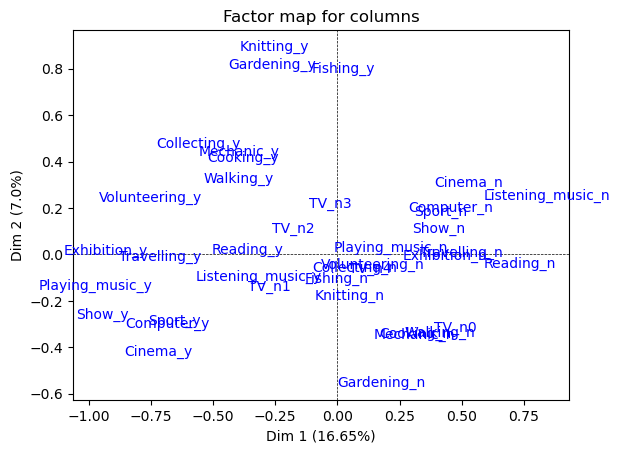

In [63]:
#carte des modalités
acm.mapping_col(num_x_axis=1,num_y_axis=2,short_labels=False)

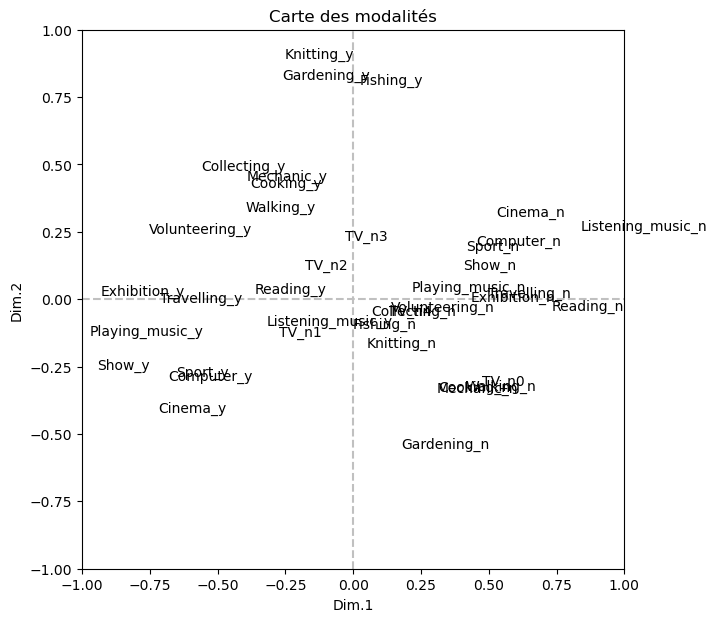

In [64]:
#pour mieux rendre compte des dispersions
#affichage dans le premier plan factoriel
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7,7))
ax.axis([-1.0,+1.0,-1.0,+1.0])
ax.plot([-1.0,+1.0],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-1.0,+1.0],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des modalités")
for i in range(coord_col.shape[0]):
    ax.text(coord_col.iloc[i,0],coord_col.iloc[i,1],coord_col.index[i])
 
plt.show()

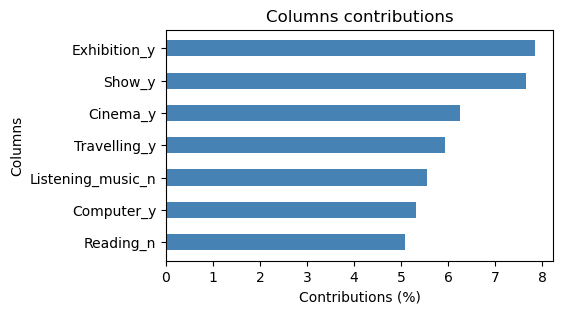

In [65]:
#contributions au premier facteur
acm.plot_col_contrib(num_axis=1,nb_values=7,short_labels=False,figsize=(5,3))

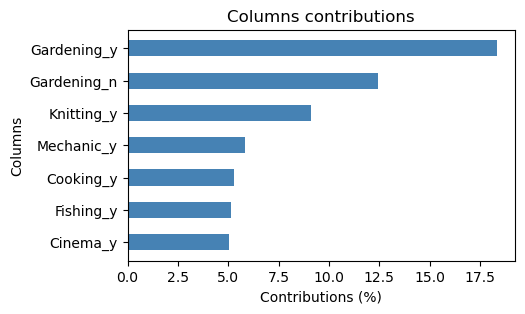

In [66]:
#contributions au second facteur
acm.plot_col_contrib(num_axis=2,nb_values=7,short_labels=False,figsize=(5,3))

## Représentation simultanée

In [67]:
#représentation des individus et des modalités possible
#dans le même repère en ACM
#acm.mapping(num_x_axis=1,num_y_axis=2)
#mais pas pertinent ici parce qu'individus nombreux et anonymes
#cf. tuto -- https://github.com/OlivierGarciaDev/fanalysis/blob/master/doc/mca_tutorial.ipynb

# Traitement des variables illustratives

## Qualitatives

In [68]:
#variables illustratives qualitatives
X_illus_quali = ind_actifs[ind_actifs.columns[18:-1]]
X_illus_quali.columns

Index(['Sex', 'Age', 'Marital_status', 'Profession'], dtype='object')

In [69]:
#positionnement de profession par ex.
coord = info_lig[['row_coord_dim1', 'row_coord_dim2']].copy()
coord["Profession"] = X_illus_quali["Profession"]

#moyennes conditionnelles - Livre, page 341
coord_fact = pandas.pivot_table(data=coord,values=['row_coord_dim1', 'row_coord_dim2'],index="Profession",aggfunc='mean')

#corrigés par la racine carrée des valeurs propres
coord_fact = coord_fact/numpy.sqrt(acm.eig_[0][:2])
print(coord_fact)

                  row_coord_dim1  row_coord_dim2
Profession                                      
Employee                0.028047        0.034695
Foreman                -0.375970        0.012330
Management             -0.688832       -0.177703
Manual_labourer         0.398133        0.237908
NotAvailable            0.049242       -0.191748
Other                  -0.141590        0.035449
Technician             -0.120254       -0.018906
Unskilled_worker        0.615680        0.115093


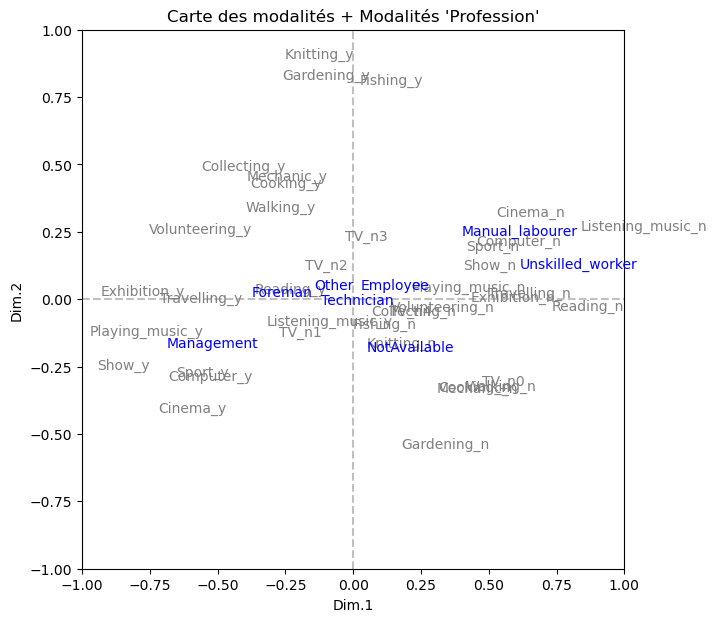

In [70]:
#placer les modalités dans le repère factoriel
fig, ax = plt.subplots(figsize=(7,7))
ax.axis([-1.0,+1.0,-1.0,+1.0])
ax.plot([-1.0,+1.0],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-1.0,+1.0],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des modalités + Modalités 'Profession'")
#modalités actives
for i in range(coord_col.shape[0]):
    ax.text(coord_col.iloc[i,0],coord_col.iloc[i,1],coord_col.index[i],color="grey")
#modalités illustratives (celles de Profession)
for i in range(coord_fact.shape[0]):
    ax.text(coord_fact.iloc[i,0],coord_fact.iloc[i,1],coord_fact.index[i],color="blue")
 
plt.show()

## Ilustratives quantitatives

In [71]:
#corrélation avec les facteurs - Livre, page 339
#on raisonne en "directions"
corr_illus = info_lig[['row_coord_dim1', 'row_coord_dim2']].corrwith(ind_actifs.nb_activitees)
print(corr_illus)

row_coord_dim1   -0.973648
row_coord_dim2    0.202817
dtype: float64


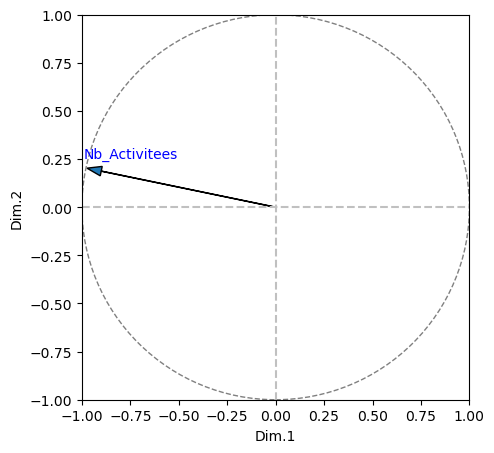

In [72]:
#un cercle des corrélations pour les illustratives quantitatives
#surtout sintéressant sur plusieurs variables illustratives quantitatives
fig, ax = plt.subplots(figsize=(5,5))
ax.axis([-1.0,+1.0,-1.0,+1.0])
ax.plot([-1.0,+1.0],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-1.0,+1.0],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
ax.add_artist(plt.Circle(xy=(0,0),radius=1,fill=False,color="gray",linestyle="--"))
ax.arrow(0,0,corr_illus[0],corr_illus[1],head_width=0.05,length_includes_head=True)
ax.text(corr_illus[0]-0.02,corr_illus[1]+0.05,"Nb_Activitees",color="blue")
plt.show()

# Individus supplémentaires

In [73]:
#chargement
ind_supp = pandas.read_excel("loisirs.xlsx",sheet_name="seniors")
ind_supp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reading          567 non-null    object
 1   Listening_music  567 non-null    object
 2   Cinema           567 non-null    object
 3   Show             567 non-null    object
 4   Exhibition       567 non-null    object
 5   Computer         567 non-null    object
 6   Sport            567 non-null    object
 7   Walking          567 non-null    object
 8   Travelling       567 non-null    object
 9   Playing_music    567 non-null    object
 10  Collecting       567 non-null    object
 11  Volunteering     567 non-null    object
 12  Mechanic         567 non-null    object
 13  Gardening        567 non-null    object
 14  Knitting         567 non-null    object
 15  Cooking          567 non-null    object
 16  Fishing          567 non-null    object
 17  TV               567 non-null    ob

In [74]:
#ditribution - variable Age (qui est illustrative en réalité)
ind_supp.Age.value_counts()

(75,85]     482
(85,100]     85
Name: Age, dtype: int64

In [75]:
#récupération des variables actives
X_supp = ind_supp[ind_supp.columns[:18]]
X_supp.columns

Index(['Reading', 'Listening_music', 'Cinema', 'Show', 'Exhibition',
       'Computer', 'Sport', 'Walking', 'Travelling', 'Playing_music',
       'Collecting', 'Volunteering', 'Mechanic', 'Gardening', 'Knitting',
       'Cooking', 'Fishing', 'TV'],
      dtype='object')

In [76]:
#calcul des coordonnées factorielles - Livre, page 335
coord_supp = acm.transform(X_supp.values)

#affichage des 2 premiers facteurs
coord_supp[:,:2]

array([[ 0.12327656, -0.28475875],
       [-0.30491255, -0.29849733],
       [ 0.58200401, -0.19445755],
       ...,
       [ 0.40001713, -0.10040159],
       [ 0.81407973, -0.24158056],
       [ 0.5941269 , -0.14633458]])

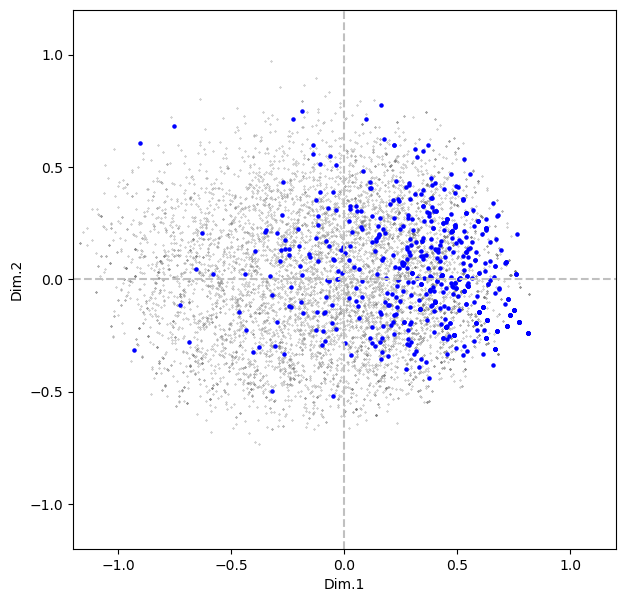

In [77]:
#superposition des individus supplémentaires
#dans la représentation factorielle des individus
fig, ax = plt.subplots(figsize=(7,7))
ax.axis([-1.2,+1.2,-1.2,+1.2])
ax.plot([-1.2,+1.2],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-1.2,+1.2],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.scatter(info_lig.iloc[:,0],info_lig.iloc[:,1],color='grey',marker='.',s=0.3)
plt.scatter(coord_supp[:,0],coord_supp[:,1],color='blue',marker='o',s=5)
plt.show()

In [78]:
#comparaison du nombre d'activités
#chez les individus initiaux
print(ind_actifs.nb_activitees.mean())
#chez les seniors (individus supplémentaires ici)
print(ind_supp.nb_activitees.mean())

7.048749361919347
4.340388007054674


# ACM++ - Corrections de Benzécri et Greenacre

In [ ]:
#voir le package "ca" pour R
#https://cran.r-project.org/package=ca

In [79]:
#ne conserver que les val.p. supérieures à la moyenne des val.p.
lambada = acm.eig_[0]
lambada = lambada[acm.eig_[0] > (1/p)]
print(lambada)

[0.19420392 0.08171353 0.07145231 0.06357372 0.05884482 0.05585231
 0.05556884]


In [80]:
#correction de Benzécri - Livre, section 5.3.2
lambada_prim = ((p/(p-1)*(lambada-1/p)))**2
print(lambada_prim)

[2.15514585e-02 7.67105863e-04 2.83311566e-04 7.20771375e-05
 1.21295220e-05 9.87255227e-08 1.97880577e-10]


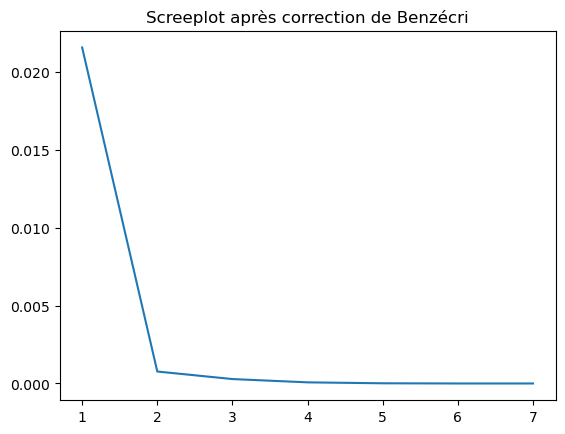

In [81]:
#screeplot
plt.title("Screeplot après correction de Benzécri")
plt.plot(numpy.arange(1,lambada_prim.shape[0]+1,1),lambada_prim)
plt.show()

In [82]:
#pourcentage d'information véhiculée -- correction de Greenacre - Livre, section 5.3.3
#somme corrigée de l'info dispo dans les données
S2nd = p/(p-1)*(numpy.sum(acm.eig_[0]**2)-(M-p)/(p**2))
print(S2nd)

0.024929277937850762


In [83]:
#application à la correction de Benzécri pour avoir les pourcentages
percent_2nd = lambada_prim/S2nd
print(percent_2nd*100)

[8.64503920e+01 3.07712829e+00 1.13646118e+00 2.89126455e-01
 4.86557295e-02 3.96022392e-04 7.93767783e-07]


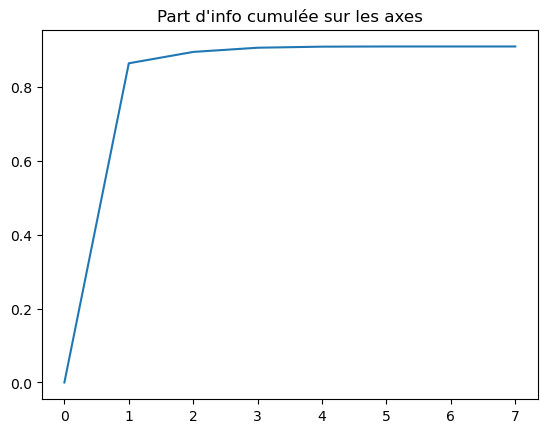

In [84]:
#graphique
plt.title("Part d'info cumulée sur les axes")
plt.plot(numpy.arange(0,lambada_prim.shape[0]+1,1),numpy.append([0],numpy.cumsum(percent_2nd)))
plt.show()

In [85]:
#correction des coordonnées des modalités
#pour rendre compte de la dispersion corrigée
coord_prim = coord_col/numpy.sqrt(acm.eig_[0][:2])*numpy.sqrt(lambada_prim[:2])
print(coord_prim)

                   col_coord_dim1  col_coord_dim2
Reading_n                0.244319       -0.004029
Reading_y               -0.120692        0.001990
Listening_music_n        0.279776        0.024620
Listening_music_y       -0.105993       -0.009327
Cinema_n                 0.175565        0.029771
Cinema_y                -0.239310       -0.040580
Show_n                   0.135103        0.010893
Show_y                  -0.314246       -0.025336
Exhibition_n             0.143874       -0.000686
Exhibition_y            -0.309807        0.001477
Computer_n               0.151780        0.019384
Computer_y              -0.226994       -0.028989
Sport_n                  0.138521        0.017630
Sport_y                 -0.217832       -0.027724
Walking_n                0.137486       -0.032774
Walking_y               -0.132389        0.031559
Travelling_n             0.165250        0.000751
Travelling_y            -0.236892       -0.001076
Playing_music_n          0.071479        0.002849


In [86]:
#vérifions les dispersions == valeurs propres corrigées ?? OUI
coord_prim.apply(axis=0,func=lambda x: numpy.sum(col_mass[0]*(x**2)))

col_coord_dim1    0.021551
col_coord_dim2    0.000767
dtype: float64

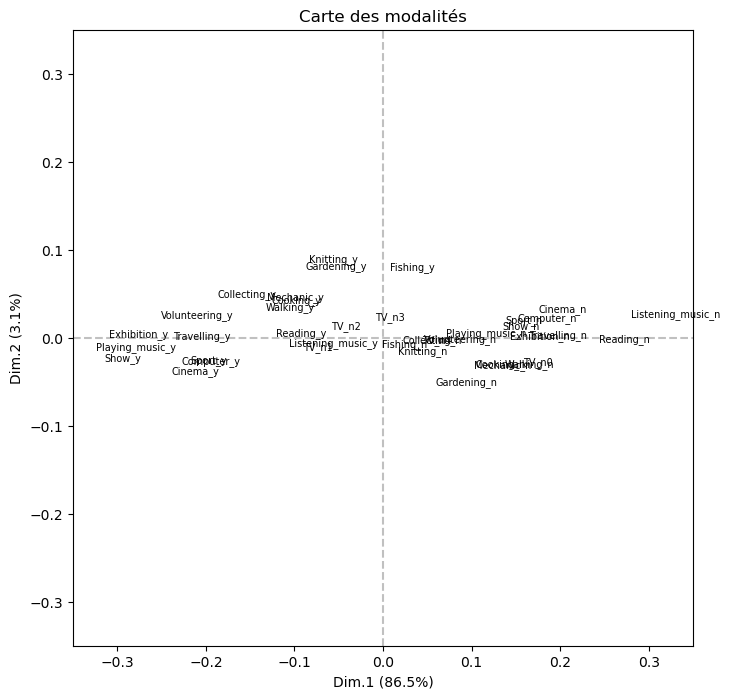

In [87]:
#représentation dans le plan factoriel
fig, ax = plt.subplots(figsize=(8,8))
ax.axis([-0.35,+0.35,-0.35,+0.35])
ax.plot([-0.35,+0.35],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.35,+0.35],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (86.5%)")
ax.set_ylabel("Dim.2 (3.1%)")
plt.title("Carte des modalités")
for i in range(coord_prim.shape[0]):
    ax.text(coord_prim.iloc[i,0],coord_prim.iloc[i,1],coord_prim.index[i],fontsize=7)
 
plt.show()